In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving dataset_new.csv to dataset_new.csv


In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn.feature_extraction.text as text
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from textblob import TextBlob
from nltk.stem import PorterStemmer,SnowballStemmer
from textblob import Word
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize.toktok import ToktokTokenizer

from io import StringIO
import os
import string
import gensim
from gensim.models import Word2Vec
import itertools
import scipy
from scipy import spatial
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
tokenizer = ToktokTokenizer()
import nltk
nltk.download('stopwords')
stopword_list = nltk.corpus.stopwords.words('english')   

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
df = pd.read_csv('dataset_new.csv',encoding='ISO-8859-1')
df.head()

,id,label,data
0,0,racism,I just a way to HATE white people. Shouldnt c...
1,1,racism,we should not conflate islamic extremism with ...
2,2,racism,us refuses to veto resolution on #israel #zion...
3,3,racism,that hammock just attempted #whitegenocide #li...
4,4,racism,bringing back morals #obama #dividerofanation


In [ ]:
df.dtypes

id        int64
label    object
data     object
dtype: object

In [ ]:
df.describe(include='all')

,id,label,data
count,2302.000000,2302,2236
unique,NaN,5,2087
top,NaN,offensive,@user #feminismiscancer #feminismisterrorism #...
freq,NaN,507,4
mean,1150.496090,NaN,NaN
std,664.674458,NaN,NaN
min,0.000000,NaN,NaN
25%,575.250000,NaN,NaN
50%,1150.000000,NaN,NaN
75%,1725.750000,NaN,NaN


In [ ]:
df.isnull().sum()/df.shape[0]*100

id       0.000000
label    0.000000
data     2.867072
dtype: float64

In [ ]:
df1 = df[['label','data']]

In [ ]:
df1 = df1[pd.notnull(df1['data'])]

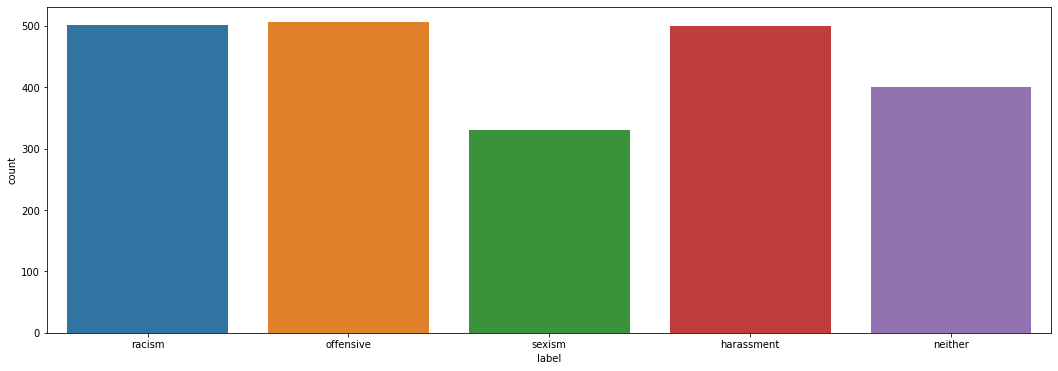

In [ ]:
fig,ax = plt.subplots(figsize=(18,6))
sns.countplot(x='label',data=df1)

**DATA PREPROCESSING**

In [ ]:
df1['data'] =df1['data'].str.replace(r'[^\w\s]',"")
df1['data']

0        I just a way to HATE white people Shouldnt cu...
1       we should not conflate islamic extremism with ...
2       us refuses to veto resolution on israel zionis...
3       that hammock just attempted whitegenocide lies...
4             bringing back morals obama dividerofanation
                              ...                        
2297    where we stay there is a bang smoker who smoke...
2298    my friends at school teasing bulling and singi...
2299                  harassment by my boss in his office
2300    when me and my friend were talking she said th...
2301    guys whistling and calling out names near my work
Name: data, Length: 2236, dtype: object

In [ ]:
df1['data'].sample(2)

1706       8220G_Anderson4 Im Dres a bitch tho8221 128527
1979    user allahsoil the term jihad is a highlyconte...
Name: data, dtype: object

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df1['data'] =df1['data'].apply(lambda x: ' '.join([i for i in x.split() if i not in stop]))

In [ ]:
##ensure text is standardized before applying this step
from textblob import TextBlob
df1['data'] =df1['data'].apply(lambda x: str(TextBlob(x).correct()))

In [ ]:
from textblob import Word

df1['data'] =df1['data'].apply(lambda x:' '.join([Word(i).lemmatize() for i in x.split()]))

racism


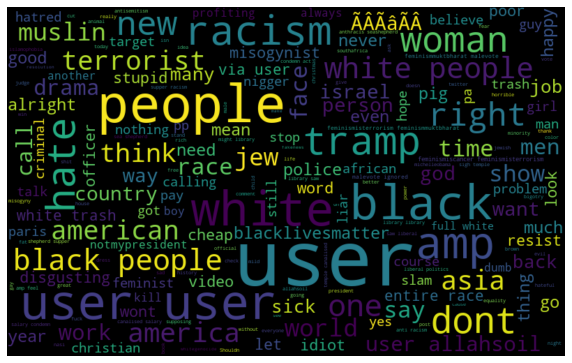

offensive


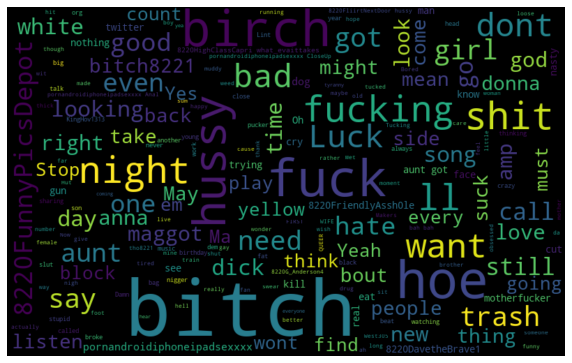

sexism


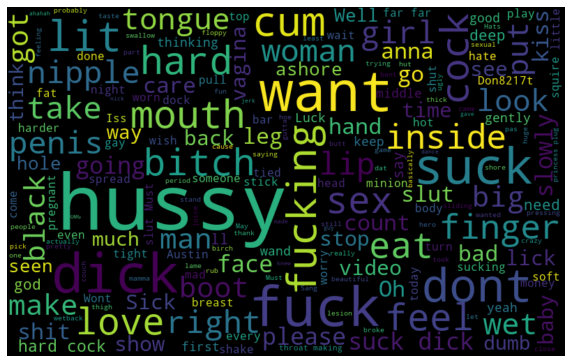

harassment


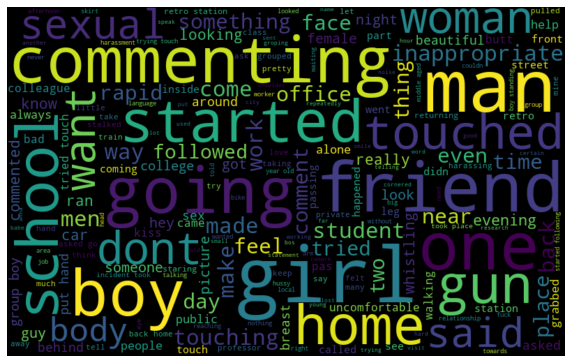

neither


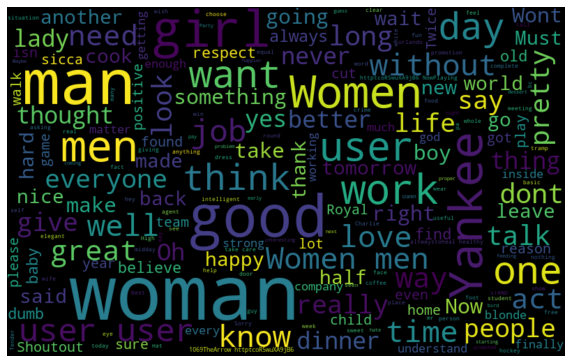

In [ ]:
for product_name in df1['label'].unique():
    print(product_name)
    all_words = ' '.join([text for text in df1.loc[df1['label'].str.contains(product_name),'data']])
    from wordcloud import WordCloud
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

In [ ]:
train_x, valid_x, train_y, valid_y = train_test_split(df1['data'], df1['label'],stratify=df1['label'], 
                                                    test_size=0.30)

In [ ]:
##label encoding target variable
enc = preprocessing.LabelEncoder()
train_y = enc.fit_transform(train_y)
valid_y = enc.fit_transform(valid_y)

In [ ]:
##tf-idf verctor representation
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(df1['data'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

In [ ]:
from sklearn.model_selection import GridSearchCV
clf = LogisticRegression()
lr_params = {'C':[int(x) for x in np.linspace(1,10,10)]}
grid_lr = GridSearchCV(estimator=clf,param_grid=lr_params,cv=5,n_jobs=-1)
grid_lr.fit(xtrain_tfidf,train_y)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
        iid='warn', n_jobs=-1,
       param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
             scoring=None, verbose=0)

In [ ]:
print(grid_lr.best_params_)
print(grid_lr.best_score_)

{'C': 4}
0.7495207667731629


In [ ]:
final_lr = LogisticRegression(C=5)
final_lr.fit(xtrain_tfidf,train_y)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
final_lr_predict = final_lr.predict(xvalid_tfidf)
lr_accuracy = metrics.accuracy_score(final_lr_predict, valid_y)
print ("Logistic Regression > Accuracy: ", lr_accuracy)

Logistic Regression > Accuracy:  0.7615499254843517


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(valid_y, final_lr_predict,target_names=df1['label'].unique()))

              precision    recall  f1-score   support

      racism       0.67      0.88      0.76       150
   offensive       0.76      0.57      0.65       120
      sexism       0.82      0.78      0.80       152
  harassment       0.88      0.86      0.87       150
     neither       0.68      0.64      0.66        99

    accuracy                           0.76       671
   macro avg       0.76      0.75      0.75       671
weighted avg       0.77      0.76      0.76       671



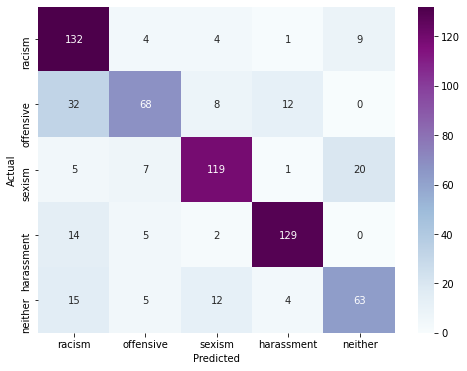

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(valid_y, final_lr_predict)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="BuPu",xticklabels=df1['label'].unique(),yticklabels=df1['label'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
from sklearn.svm import LinearSVC
svc_model = LinearSVC()
svc_params = {'C':[0.01,0.1, 1, 10, 100, 1000]}
grid_svc = GridSearchCV(estimator=svc_model,param_grid=svc_params,cv=5,n_jobs=-1)
grid_svc.fit(xtrain_tfidf,train_y)

GridSearchCV(cv=5, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
        iid='warn', n_jobs=-1,
       param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
             scoring=None, verbose=0)

In [ ]:
print(grid_svc.best_params_)
print(grid_svc.best_score_)

{'C': 0.1}
0.744408945686901


In [ ]:
final_svc = LinearSVC(C=0.1)
final_svc.fit(xtrain_tfidf,train_y)

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
final_svc_predict = final_svc.predict(xvalid_tfidf)
svc_accuracy = metrics.accuracy_score(final_svc_predict, valid_y)
print ("SVC > Accuracy: ", svc_accuracy)

SVC > Accuracy:  0.7511177347242921


In [ ]:
print(classification_report(valid_y, final_svc_predict,target_names=df1['label'].unique()))

              precision    recall  f1-score   support

      racism       0.65      0.87      0.74       150
   offensive       0.82      0.51      0.63       120
      sexism       0.79      0.80      0.79       152
  harassment       0.85      0.89      0.87       150
     neither       0.67      0.60      0.63        99

    accuracy                           0.75       671
   macro avg       0.76      0.73      0.73       671
weighted avg       0.76      0.75      0.75       671



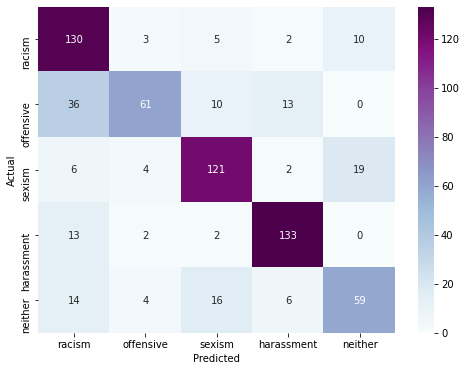

In [ ]:
conf_mat = confusion_matrix(valid_y, final_svc_predict)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="BuPu",xticklabels=df1['label'].unique(),yticklabels=df1['label'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### **XGBOOST**

In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(max_depth=50, n_estimators=80, learning_rate=0.1, colsample_bytree=.7, gamma=0, reg_alpha=4, eta=0.3, silent=1, subsample=0.8)
xgb_model.fit(xtrain_tfidf, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, eta=0.3, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=50,
              min_child_weight=1, missing=None, n_estimators=80, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=4, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=1, subsample=0.8, verbosity=1)

In [ ]:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, eta=0.3, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=50, min_child_weight=1, missing=None,
       n_estimators=80, n_jobs=1, nthread=None, objective='multi:softprob',
       random_state=0, reg_alpha=4, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=1, subsample=0.8)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, eta=0.3, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=50,
              min_child_weight=1, missing=None, n_estimators=80, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=4, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=1, subsample=0.8, verbosity=1)

In [ ]:
xgb_predict = xgb_model.predict(xvalid_tfidf)
xgb_accuracy = metrics.accuracy_score(xgb_predict, valid_y)
print ("XGBoost > Accuracy: ", xgb_accuracy)

XGBoost > Accuracy:  0.6900149031296572


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(valid_y, xgb_predict,target_names=df1['label'].unique()))

              precision    recall  f1-score   support

      racism       0.57      0.82      0.67       150
   offensive       0.66      0.57      0.62       120
      sexism       0.82      0.71      0.76       152
  harassment       0.86      0.75      0.80       150
     neither       0.57      0.52      0.54        99

    accuracy                           0.69       671
   macro avg       0.70      0.67      0.68       671
weighted avg       0.71      0.69      0.69       671



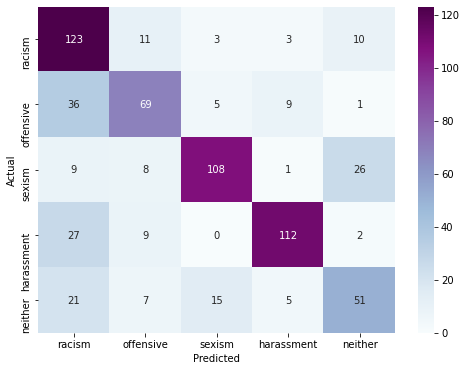

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(valid_y, xgb_predict)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="BuPu",xticklabels=df1['label'].unique(),yticklabels=df1['label'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# **DEEP LEARNING MODEL**

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D, Conv1D, SimpleRNN
from keras.models import Model
from keras.models import Sequential
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.layers import Dense, Input, Flatten, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Sequential


In [ ]:
total_complaints = np.append(train_x.values,valid_x.values)
tokenizer = Tokenizer(num_words=25000)
tokenizer.fit_on_texts(train_x.values)#total_complaints
train_sequences = tokenizer.texts_to_sequences(train_x.values)
test_sequences = tokenizer.texts_to_sequences(valid_x.values)

In [ ]:
word_index = tokenizer.word_index# dictionary containing words and their index
print('Found %s unique tokens.' % len(word_index))

Found 4169 unique tokens.


In [ ]:
MAX_SEQUENCE_LENGTH = max([len(c.split()) for c in total_complaints])

In [ ]:
train_data = pad_sequences(train_sequences,padding='post')
test_data = pad_sequences(test_sequences,padding='post')

In [ ]:
print(train_data.shape)
print(test_data.shape)

(1565, 384)
(671, 28)


In [ ]:
enc = preprocessing.LabelEncoder()
train_labels = enc.fit_transform(train_y)
test_labels = enc.fit_transform(valid_y)

In [ ]:
print(enc.classes_)
print(np.unique(train_labels, return_counts=True))
print(np.unique(test_labels, return_counts=True))

[0 1 2 3 4]
(array([0, 1, 2, 3, 4]), array([349, 280, 354, 351, 231]))
(array([0, 1, 2, 3, 4]), array([150, 120, 152, 150,  99]))


In [ ]:
labels_train = to_categorical(np.asarray(train_labels))
labels_test = to_categorical(np.asarray(test_labels))
print('Shape of data tensor:', train_data.shape)
print('Shape of label tensor:', labels_train.shape)
print('Shape of label tensor:', labels_test.shape)

Shape of data tensor: (1565, 384)
Shape of label tensor: (1565, 5)
Shape of label tensor: (671, 5)


# **CNN w/ Pre-trained word embeddings(GloVe)**

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2021-07-02 23:23:22--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-07-02 23:23:23--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-07-02 23:23:23--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
!unzip glove*.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [ ]:
!ls
!pwd

dataset_new.csv    glove.6B.200d.txt  glove.6B.50d.txt	sample_data
glove.6B.100d.txt  glove.6B.300d.txt  glove.6B.zip
/content


In [ ]:
#wget http://nlp.stanford.edu/data/glove.6B.zip
GLOVE_DIR = '/mnt/data/temp/nlp/'
embeddings_index = {}
f = open('glove.6B.100d.txt', encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [ ]:
EMBEDDING_DIM = 100
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [ ]:
#[(k,v) for k,v in word_index.items() if v==4]

[('like', 4)]

In [ ]:
vocab_size = len(tokenizer.word_index)+1

In [ ]:
from keras.layers import GlobalMaxPooling1D

In [ ]:
MAX_SEQUENCE_LENGTH

384

In [ ]:
model = Sequential()
model.add(Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=283,
                            trainable=True))
model.add(Dropout(0.3))
model.add(Conv1D(32, 3, activation="relu"))
model.add(MaxPooling1D())
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Conv1D(32, 3, activation="relu"))
model.add(MaxPooling1D())
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(GlobalMaxPooling1D())
model.add(Flatten())
model.add(Dense(32, activation="relu"))
model.add(Dense(5, activation="softmax"))
model.compile(loss='categorical_crossentropy',
 optimizer="rmsprop",
 metrics=['acc'])

In [ ]:
print(model.summary())

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 283, 100)          417000    
_________________________________________________________________
dropout_31 (Dropout)         (None, 283, 100)          0         
_________________________________________________________________
conv1d_22 (Conv1D)           (None, 281, 32)           9632      
_________________________________________________________________
max_pooling1d_22 (MaxPooling (None, 140, 32)           0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 140, 32)           0         
_________________________________________________________________
batch_normalization_22 (Batc (None, 140, 32)           128       
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 138, 32)         

In [ ]:
history = model.fit(train_data, labels_train,
 batch_size=84,
 epochs=100,
 validation_data=(test_data, labels_test))


Epoch 1/100
19/19 [==============================] - 3s 160ms/step - loss: 0.8555 - acc: 0.6594 - val_loss: 0.9560 - val_acc: 0.6051
Epoch 2/100
19/19 [==============================] - 3s 160ms/step - loss: 0.7944 - acc: 0.6843 - val_loss: 0.9446 - val_acc: 0.5946
Epoch 3/100
19/19 [==============================] - 3s 159ms/step - loss: 0.7987 - acc: 0.6882 - val_loss: 0.9266 - val_acc: 0.6185
Epoch 4/100
19/19 [==============================] - 3s 157ms/step - loss: 0.7679 - acc: 0.6965 - val_loss: 0.9189 - val_acc: 0.6170
Epoch 5/100
19/19 [==============================] - 3s 162ms/step - loss: 0.7272 - acc: 0.7150 - val_loss: 0.9050 - val_acc: 0.6274
Epoch 6/100
19/19 [==============================] - 3s 160ms/step - loss: 0.7530 - acc: 0.7112 - val_loss: 0.8949 - val_acc: 0.6364
Epoch 7/100
19/19 [==============================] - 3s 159ms/step - loss: 0.6939 - acc: 0.7374 - val_loss: 0.9053 - val_acc: 0.6259
Epoch 8/100
19/19 [==============================] - 3s 160ms/step - 

In [ ]:
score = model.evaluate(test_data, labels_test)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

21/21 [==============================] - 0s 2ms/step - loss: 0.9850 - acc: 0.7437
Test Score: 0.9849779605865479
Test Accuracy: 0.7436661720275879


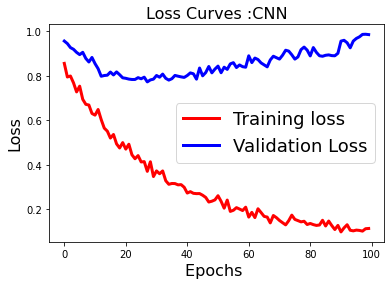

In [ ]:
fig1 = plt.figure()
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves :CNN',fontsize=16)
plt.show()

In [ ]:
#predictions on test data
predicted=model.predict(test_data)
predicted

array([[6.8806956e-04, 3.7874711e-01, 8.6637447e-03, 6.1071545e-01,
        1.1856636e-03],
       [3.1130159e-02, 2.2877452e-01, 1.7565273e-01, 1.5570857e-02,
        5.4887170e-01],
       [4.2020620e-08, 9.2435792e-10, 1.3531335e-03, 1.2630470e-10,
        9.9864680e-01],
       ...,
       [1.0980105e-05, 4.0225018e-06, 4.5858575e-03, 2.0541677e-06,
        9.9539703e-01],
       [6.4740442e-11, 2.4571523e-02, 3.3091831e-09, 9.7542852e-01,
        3.1609795e-11],
       [6.8394417e-01, 2.2872972e-01, 1.7302649e-02, 2.8987730e-02,
        4.1035738e-02]], dtype=float32)

In [ ]:
#model evaluation
import sklearn
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(labels_test, predicted.round())
print('precision: \n{}'.format(precision))
print('recall: \n{}'.format(recall))
print('fscore: \n{}'.format(fscore))
print('support: \n{}'.format(support))

precision: 
[0.76027397 0.69090909 0.87692308 0.88721805 0.625     ]
recall: 
[0.74       0.63333333 0.75       0.78666667 0.60606061]
fscore: 
[0.75       0.66086957 0.80851064 0.83392226 0.61538462]
support: 
[150 120 152 150  99]


In [ ]:
print(classification_report(labels_test, predicted.round(),target_names=df1['label'].unique()))

              precision    recall  f1-score   support

      racism       0.76      0.74      0.75       150
   offensive       0.69      0.63      0.66       120
      sexism       0.88      0.75      0.81       152
  harassment       0.89      0.79      0.83       150
     neither       0.62      0.61      0.62        99

   micro avg       0.78      0.71      0.74       671
   macro avg       0.77      0.70      0.73       671
weighted avg       0.78      0.71      0.75       671
 samples avg       0.71      0.71      0.71       671



# **RNN**

In [ ]:
#Bidirectional LSTM

model = Sequential()
model.add(Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=True))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(100)))
model.add(Dropout(0.3))
model.add(Dense(5,activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])


In [ ]:
history = model.fit(train_data, labels_train,
 batch_size=64,
 epochs=20,
 validation_data=(test_data, labels_test))

Epoch 1/20
25/25 [==============================] - 27s 926ms/step - loss: 1.5028 - acc: 0.3888 - val_loss: 1.2104 - val_acc: 0.5708
Epoch 2/20
25/25 [==============================] - 22s 870ms/step - loss: 1.1210 - acc: 0.5690 - val_loss: 1.0428 - val_acc: 0.6259
Epoch 3/20
25/25 [==============================] - 22s 876ms/step - loss: 0.9680 - acc: 0.6422 - val_loss: 0.9578 - val_acc: 0.6572
Epoch 4/20
25/25 [==============================] - 22s 871ms/step - loss: 0.8287 - acc: 0.7089 - val_loss: 0.9295 - val_acc: 0.6557
Epoch 5/20
25/25 [==============================] - 22s 875ms/step - loss: 0.7613 - acc: 0.7487 - val_loss: 0.8840 - val_acc: 0.6528
Epoch 6/20
25/25 [==============================] - 22s 875ms/step - loss: 0.6614 - acc: 0.7675 - val_loss: 0.8231 - val_acc: 0.7034
Epoch 7/20
25/25 [==============================] - 22s 874ms/step - loss: 0.6017 - acc: 0.7878 - val_loss: 0.8175 - val_acc: 0.6826
Epoch 8/20
25/25 [==============================] - 22s 878ms/step - 

In [ ]:
score = model.evaluate(test_data, labels_test)
print("Test Accuracy:", score[1])

21/21 [==============================] - 0s 11ms/step - loss: 0.9854 - acc: 0.7317
Test Accuracy: 0.7317436933517456


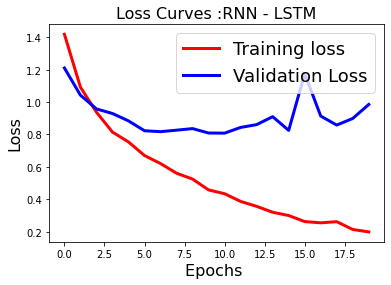

In [ ]:
fig1 = plt.figure()
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves :RNN - LSTM',fontsize=16)
plt.show()

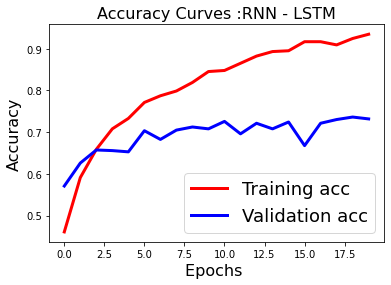

In [ ]:
fig1 = plt.figure()
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training acc', 'Validation acc'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves :RNN - LSTM',fontsize=16)
plt.show()

In [ ]:
#predictions on test data
predicted=model.predict(test_data)
predicted

array([[2.06322526e-04, 1.61989518e-02, 5.71167236e-03, 9.75113750e-01,
        2.76932190e-03],
       [1.59713641e-01, 9.22848880e-02, 3.00567374e-02, 2.95614023e-02,
        6.88383281e-01],
       [1.13678470e-04, 1.77938316e-04, 8.90413532e-04, 9.76804222e-06,
        9.98808265e-01],
       ...,
       [8.83376133e-03, 5.41732181e-03, 2.30378378e-03, 1.81859301e-04,
        9.83263254e-01],
       [1.29986904e-04, 1.18129924e-01, 1.00986959e-04, 8.81543338e-01,
        9.57563389e-05],
       [7.50305116e-01, 8.08251202e-02, 1.66408494e-02, 7.63990125e-03,
        1.44588992e-01]], dtype=float32)

In [ ]:
#model evaluation
import sklearn
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(labels_test, predicted.round())
print('precision: \n{}'.format(precision))
print('recall: \n{}'.format(recall))
print('fscore: \n{}'.format(fscore))
print('support: \n{}'.format(support))
print("############################")

precision: 
[0.62980769 0.73563218 0.93203883 0.92       0.62745098]
recall: 
[0.87333333 0.53333333 0.63157895 0.76666667 0.64646465]
fscore: 
[0.73184358 0.61835749 0.75294118 0.83636364 0.63681592]
support: 
[150 120 152 150  99]
############################


In [ ]:
print(classification_report(labels_test, predicted.round(),target_names=df1['label'].unique()))

              precision    recall  f1-score   support

      racism       0.63      0.87      0.73       150
   offensive       0.74      0.53      0.62       120
      sexism       0.93      0.63      0.75       152
  harassment       0.92      0.77      0.84       150
     neither       0.63      0.65      0.64        99

   micro avg       0.75      0.70      0.73       671
   macro avg       0.77      0.69      0.72       671
weighted avg       0.78      0.70      0.73       671
 samples avg       0.70      0.70      0.70       671

